In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("/content/drive/MyDrive/EDA - EDA.csv.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [65]:
df.shape

(19689, 10)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [67]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [70]:
df.describe(include="object")

,Crop,Season,State
count,19689,19689,19689
unique,55,6,30
top,Rice,Kharif,Karnataka
freq,1197,8232,1432


In [71]:
df.describe

<bound method NDFrame.describe of                 Crop  Crop_Year      Season              State      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997      Kharif              Assam    6637.0   
2        Castor seed       1997      Kharif              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4       Cotton(lint)       1997      Kharif              Assam    1739.0   
...              ...        ...         ...                ...       ...   
19684  Small millets       1998      Kharif           Nagaland    4000.0   
19685          Wheat       1998        Rabi           Nagaland    1000.0   
19686          Maize       1997      Kharif  Jammu and Kashmir  310883.0   
19687           Rice       1997      Kharif  Jammu and Kashmir  275746.0   
19688          Wheat       1997        Rabi  Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]>

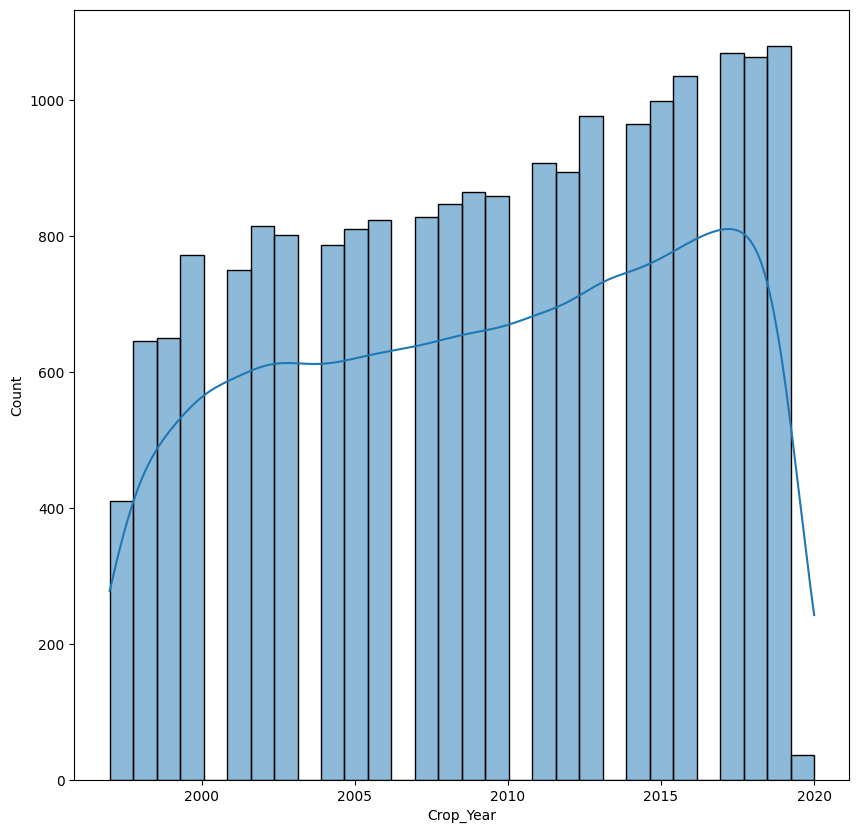

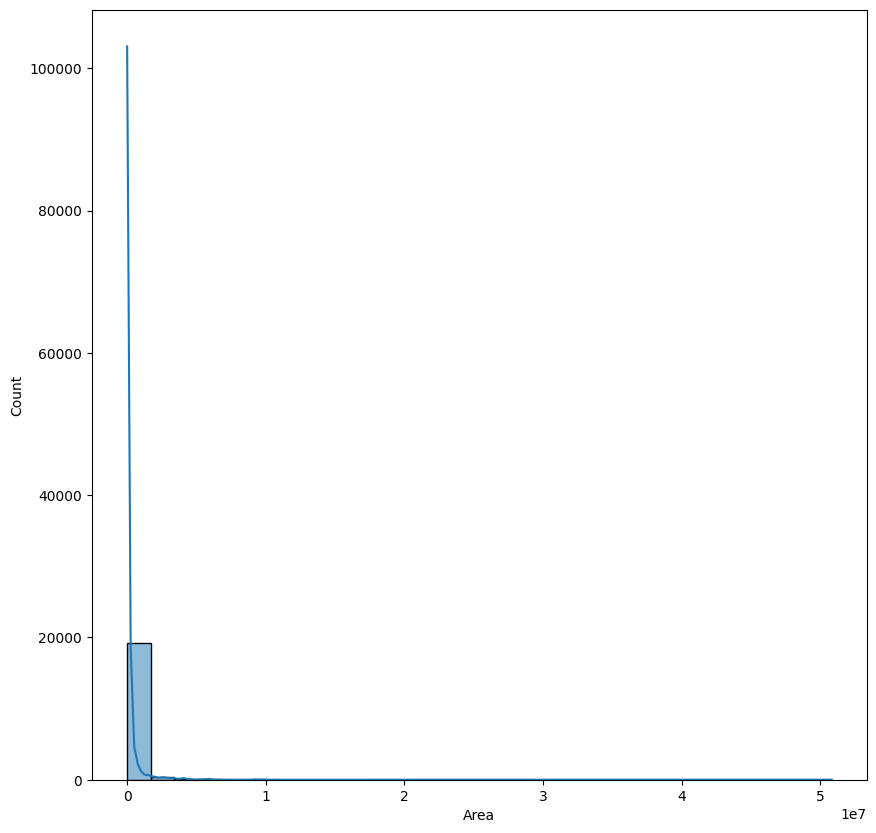

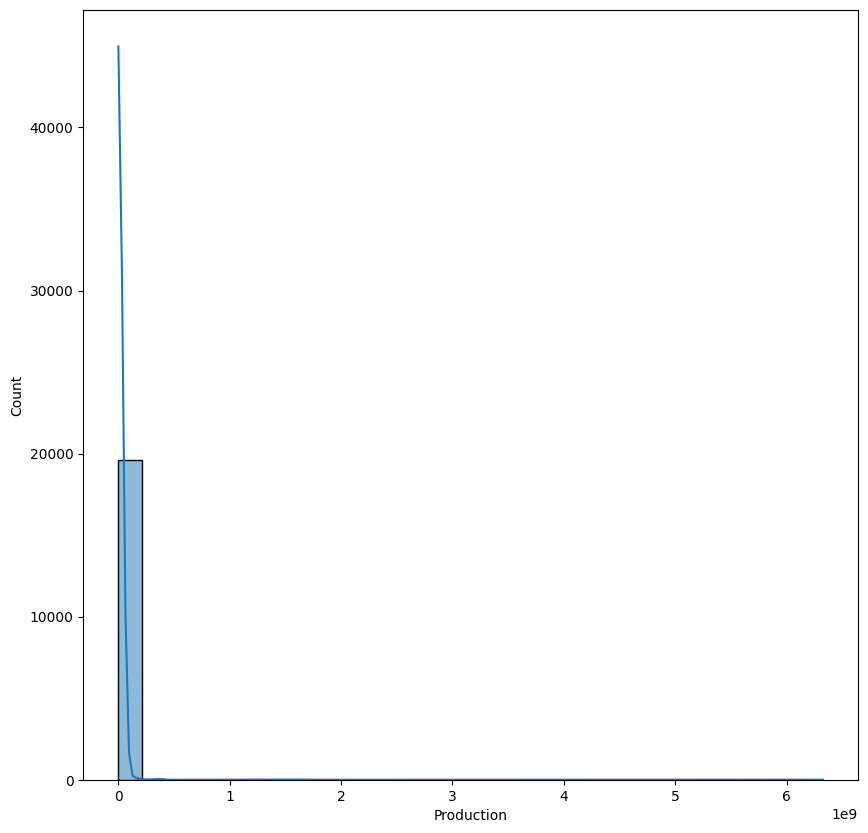

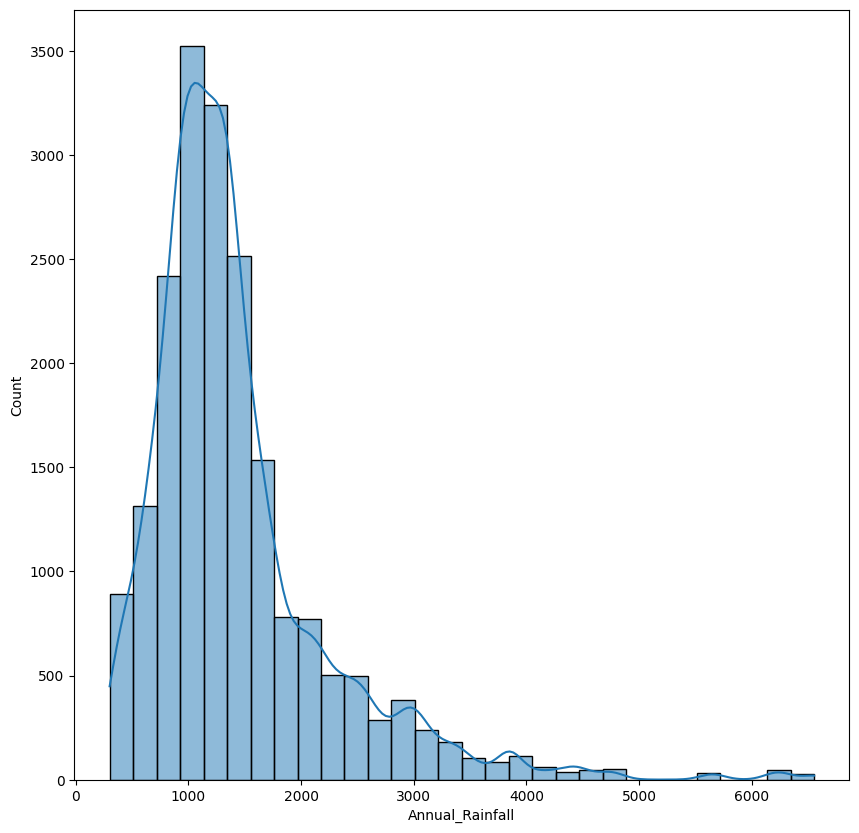

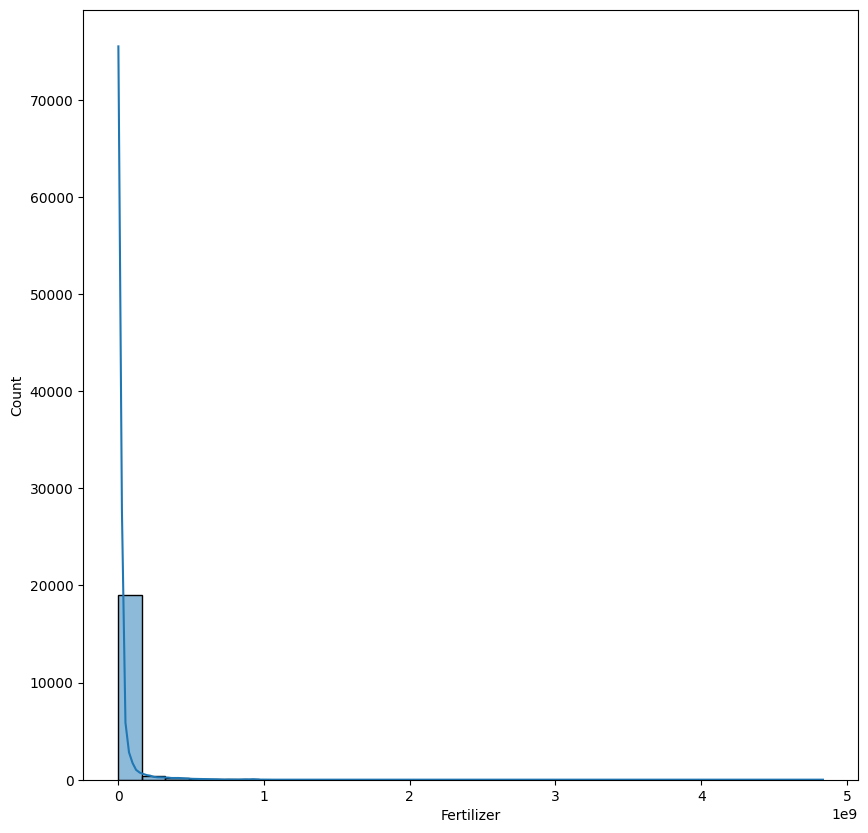

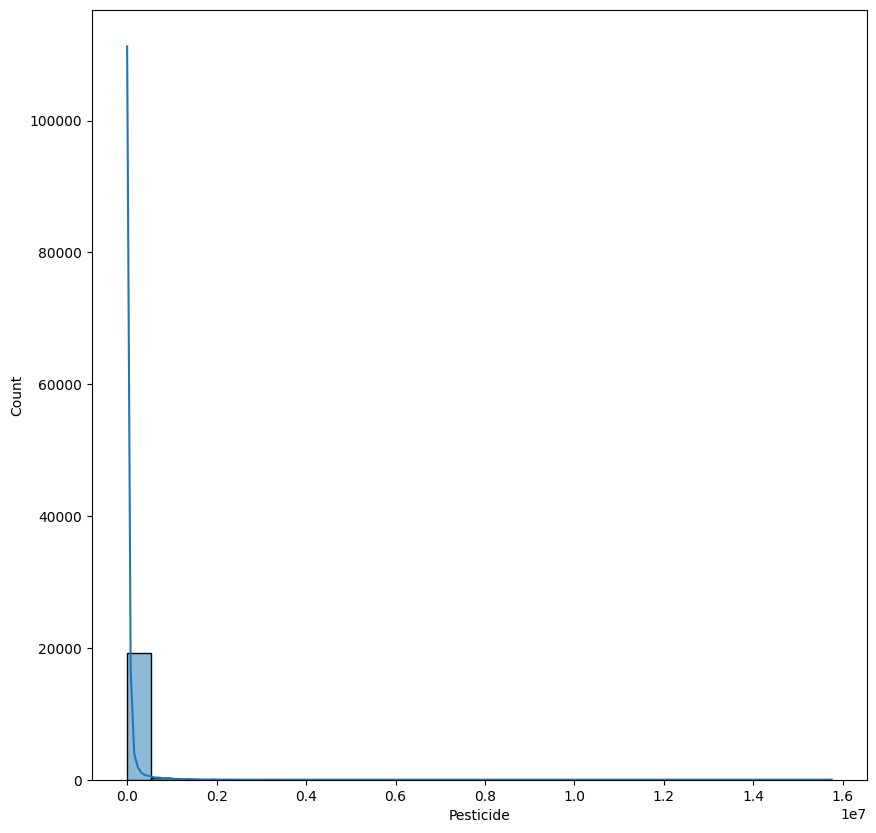

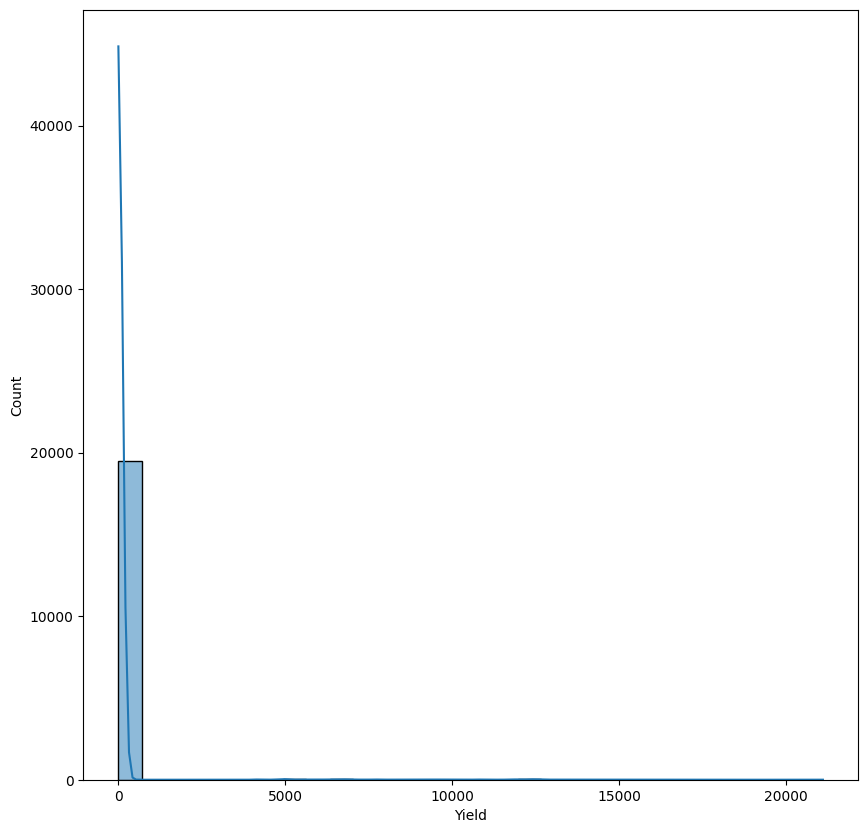

In [72]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,10))
  sns.histplot(df[i],kde=True,bins=30)
  plt.show()

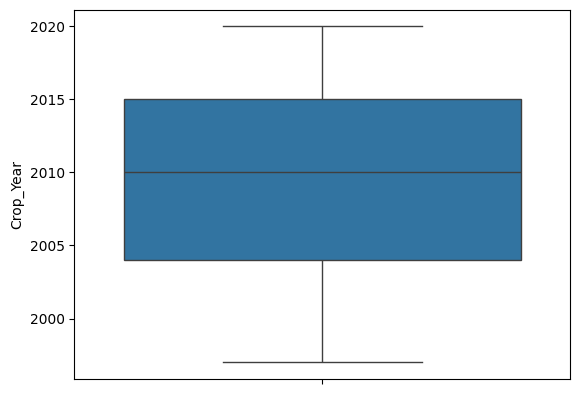

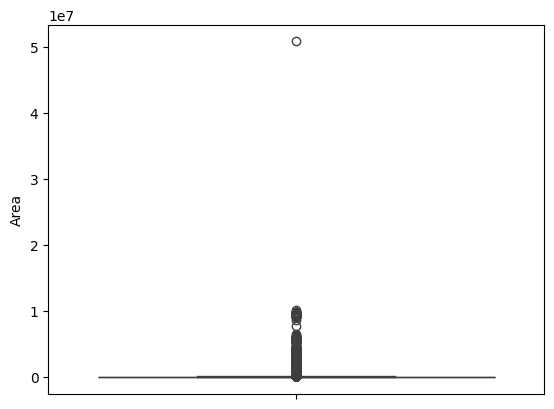

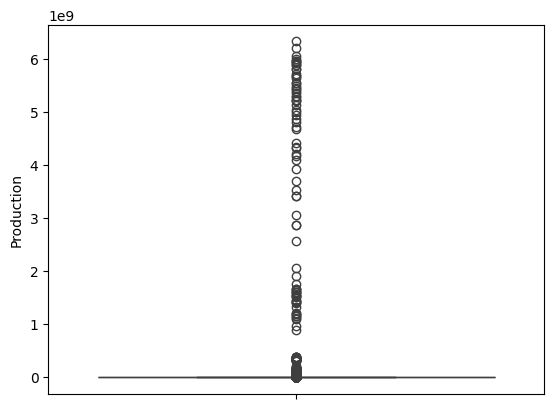

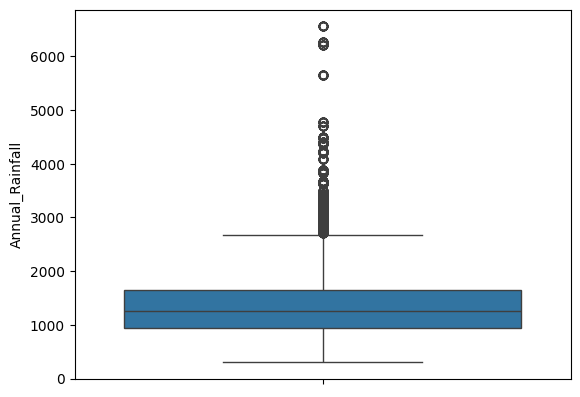

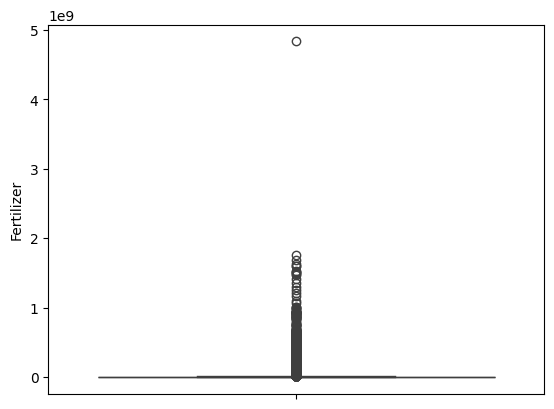

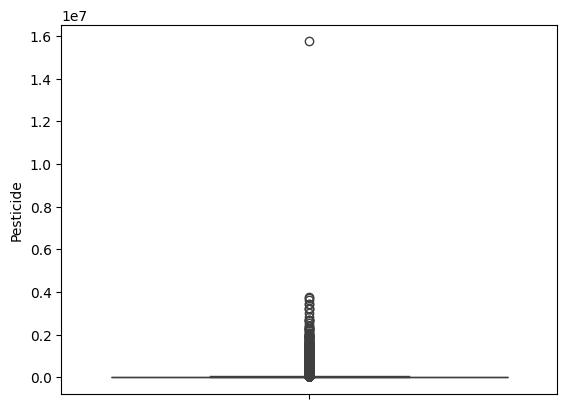

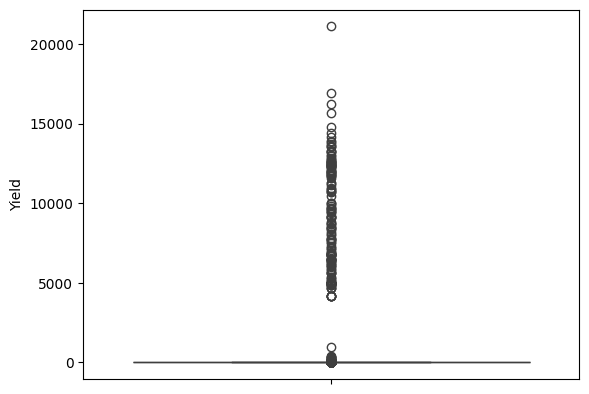

In [73]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()


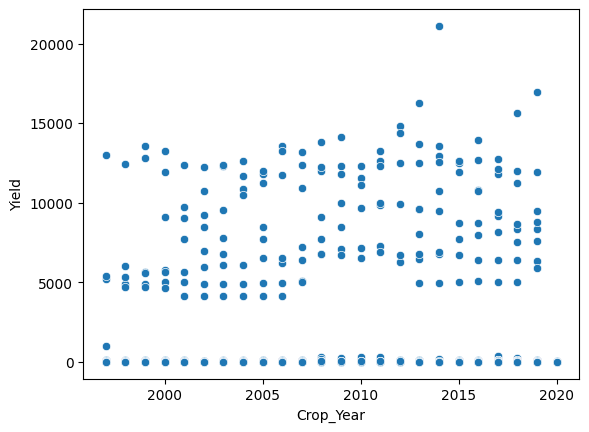

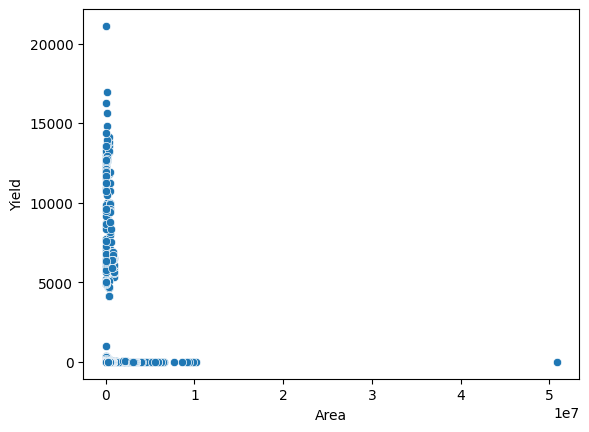

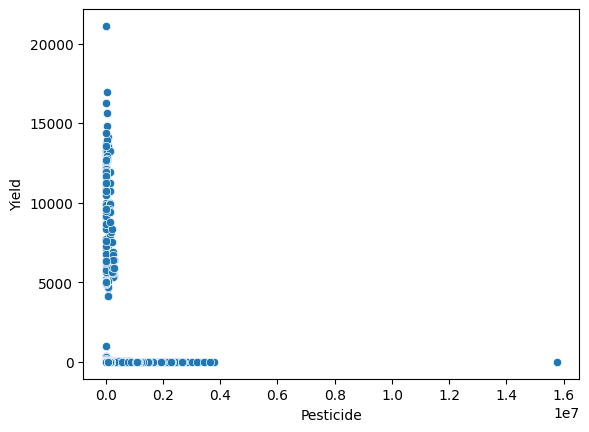

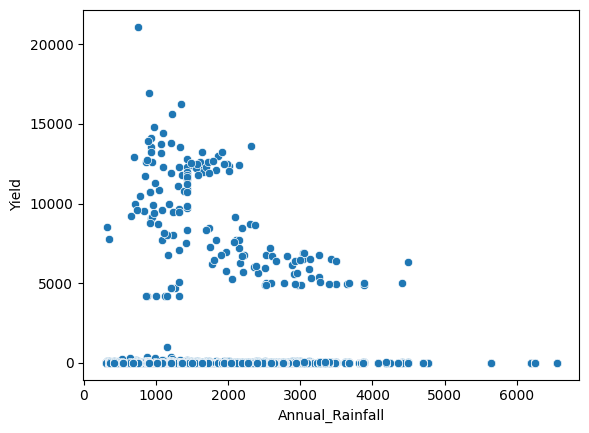

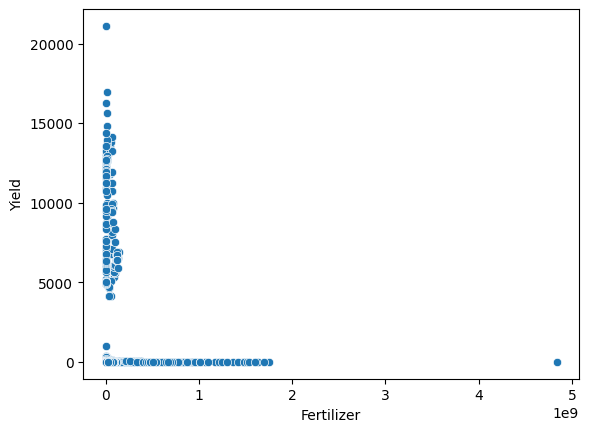

In [74]:
for i in ['Crop_Year','Area','Pesticide','Annual_Rainfall','Fertilizer']:
 sns.scatterplot(data=df,x=i,y="Yield")
 plt.show()


<Axes: >

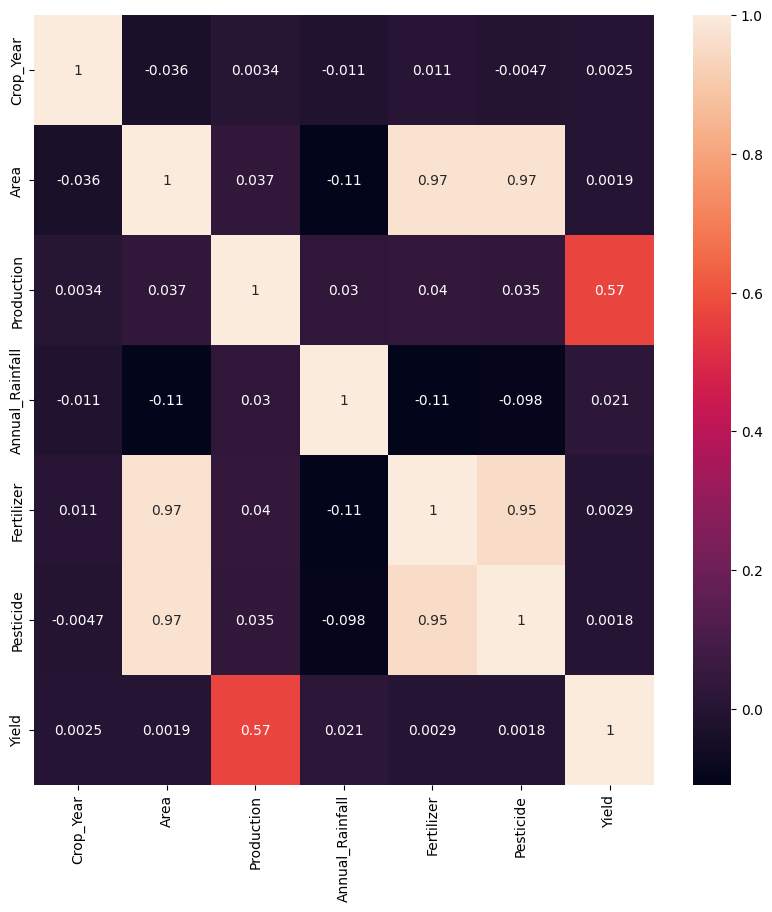

In [75]:
h=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(h,annot=True)